In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.mpl.ticker as cticker
import datetime as dt

import matplotlib.dates as mdates

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import pickle

import os
    
plotdir = './plots/precip/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)  
datadir = '../data/'    
if not os.path.exists(datadir):
    os.makedirs(datadir)   

#sns.set(font='Franklin Gothic Book',
sns.set(rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'black',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'xtick.bottom': True,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

In [2]:
# THIS STEP IS ONLY NECESSARY IF PICKLE IS NOT USED!!

expid_list= ["hqys","hmrt","hr2n","hmt0","hr0n","hr2o"]
expid_list2= ["hqys","ho8i","hr2n","ho8f","hr0n","hr2o"]

# FESOM family is red, NEMO family blue
color_list    = ["#ff0000","#ff0000","#0000ff","#0000ff","darkorange","midnightblue"]
# give IFS resolution only, FESOM/NEMO don't change from 25/5km
name_list   = ["Cycle 2, 4.4km, IFS-FESOM, Deep Off","Cycle 1, 4.4km, IFS-NEMO, Deep Off","Cycle 2, 9km, IFS-NEMO, Deep On","Cycle 1, 9km, IFS-NEMO, Deep On","Cycle 2, 2.8km, IFS-FESOM, Deep Off","Cycle 2, 9km, IFS-NEMO, Deep Off"]
# Cycle 3 is solid, Cycle 2/1 dashed
array_linestyle= ["dashed","dotted","dashed","dotted","dashed","dashed"]
# main simulation is thicker to stand out
array_linewidth= [2,2,2,2,2,2]


IMB = {}
time = {}
for e in range(len(expid_list)):

            infile = f"/ec/res4/scratch/natb/hugetmp/natb/47r1/hres_{expid_list[e]}_2D_e_1d_mmperd_fldmean.nc"
            filP = xr.open_dataset(infile)
            if expid_list[e] == "hr2n":
              Evap = filP.variables['var147'].squeeze()
            else:
              Evap = filP.variables['var182'].squeeze()
            infile = f"/ec/res4/scratch/natb/hugetmp/natb/47r1/hres_{expid_list[e]}_2D_tp_1d_mmperd_fldmean.nc"
            filP = xr.open_dataset(infile)
            Pr = filP.variables['var228'].squeeze()
            infile = f"/ec/res4/scratch/natb/hugetmp/natb/47r1/tcw_deacc_hres_{expid_list[e]}_daily_fldmean.nc"
            filP = xr.open_dataset(infile)
            TC = filP.variables['var136'].squeeze()
            time[e]=filP.time

            IMB[e]=86400*TC+Evap+Pr
            IMB[e]=IMB[e]/Pr  #get in % of precip    
            
totE = {}
timeE = {}
for e in range(len(expid_list2)):
       if expid_list2[e] == "ho8f" or expid_list2[e] == "ho8i":            
            infile = f"/ec/res4/scratch/natb/hugetmp/natb/47r1/energy_leakage_total_wo_dissipation_hres_{expid_list2[e]}_daily_fldmean.nc"
            filP = xr.open_dataset(infile)
            ent_tot = filP.variables['var229'].squeeze()
            infile = f"/ec/res4/scratch/natb/hugetmp/natb/47r1/z_times_sp_deacc_hres_{expid_list2[e]}_daily_fldmean.nc"
            filP = xr.open_dataset(infile)
            ent_geo = filP.variables['z'].squeeze()            
            infile = f"/ec/res4/scratch/natb/hugetmp/natb/47r1/inss_deacc_hres_{expid_list2[e]}_daily_fldmean.nc"
            filP = xr.open_dataset(infile)
            KE = filP.variables['var230'].squeeze() 
            totE[e]= - ( ent_tot + ent_geo + KE )
       else:
            infile = f"/ec/res4/scratch/natb/hugetmp/natb/47r1/energy_leakage_total_hres_{expid_list2[e]}_daily_fldmean.nc"
            filP = xr.open_dataset(infile)
            vipie = filP.variables['vipie'].squeeze()
            infile = f"/ec/res4/scratch/natb/hugetmp/natb/47r1/vike_deacc_hres_{expid_list2[e]}_daily_fldmean.nc"
            filP = xr.open_dataset(infile)
            vike = filP.variables['vike'].squeeze()    
            totE[e]=  - ( vipie + vike )
       timeE[e]=filP.time     
    
    
# WRITE PICKLE

# Open a file and use dump()
with open(datadir + 'Moist_budg_diff_percent_total_energy_imbalance_NextGEMS_Cycle1_vs_Cycle2_complete_daily.pickle', 'wb') as file:
      
    # A new file will be created
    pickle.dump([IMB,time,totE,timeE], file)     

In [2]:
# CONTINUE HERE IF PICKLE IS USED

with open(datadir + 'Moist_budg_diff_percent_total_energy_imbalance_NextGEMS_Cycle1_vs_Cycle2_complete_daily.pickle', 'rb') as file:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    IMB,time,totE,timeE = pickle.load(file)

        

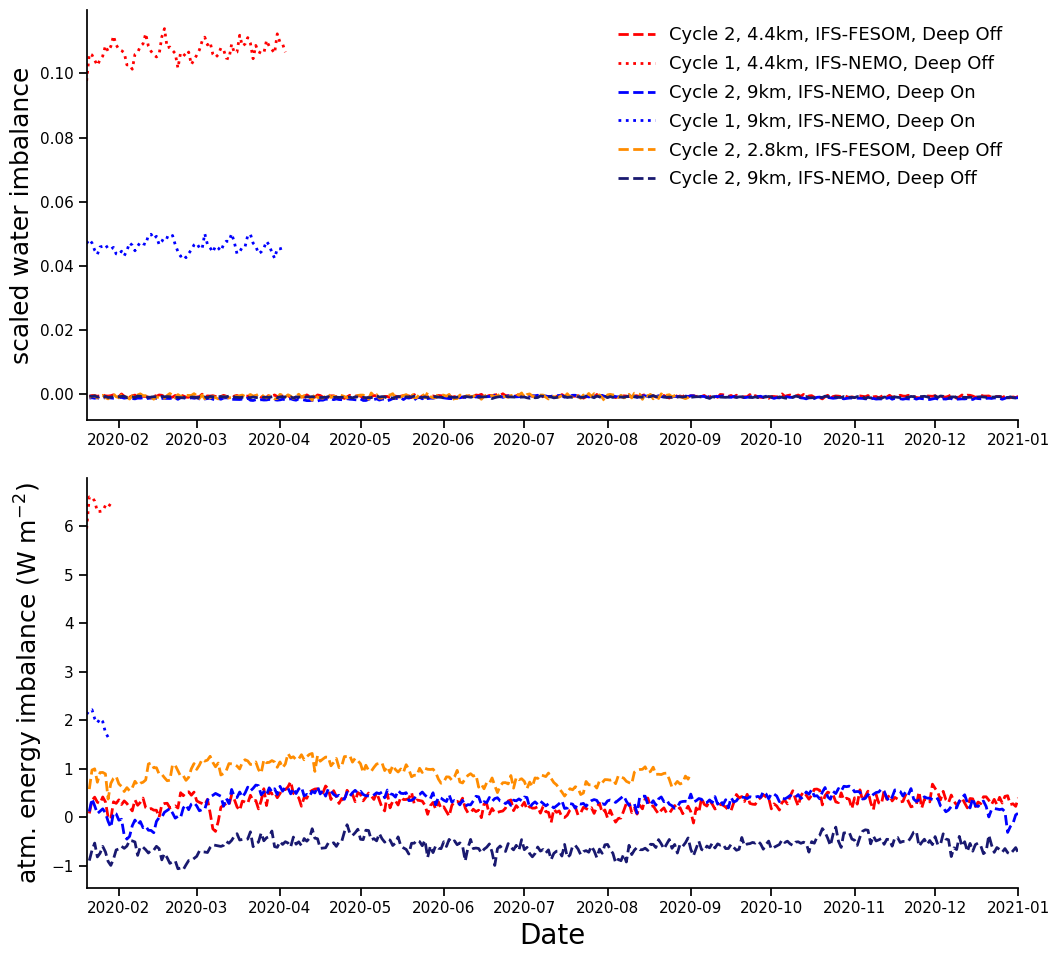

In [3]:
expid_list= ["hqys","hmrt","hr2n","hmt0","hr0n","hr2o"]
expid_list2= ["hqys","ho8i","hr2n","ho8f","hr0n","hr2o"]

# FESOM family is red, NEMO family blue
color_list    = ["#ff0000","#ff0000","#0000ff","#0000ff","darkorange","midnightblue"]
# give IFS resolution only, FESOM/NEMO don't change from 25/5km
name_list   = ["Cycle 2, 4.4km, IFS-FESOM, Deep Off","Cycle 1, 4.4km, IFS-NEMO, Deep Off","Cycle 2, 9km, IFS-NEMO, Deep On","Cycle 1, 9km, IFS-NEMO, Deep On","Cycle 2, 2.8km, IFS-FESOM, Deep Off","Cycle 2, 9km, IFS-NEMO, Deep Off"]
# Cycle 3 is solid, Cycle 2/1 dashed
array_linestyle= ["dashed","dotted","dashed","dotted","dashed","dashed"]
# main simulation is thicker to stand out
array_linewidth= [2,2,2,2,2,2]



# plot
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(11,10))
axes = ax.flatten()

for a in range(len(axes)):
 if a == 0:
  for (e,exp),color,labels,linestyle,linewidth in zip(enumerate(expid_list),color_list,name_list,array_linestyle,array_linewidth): 

    axes[a].plot(time[e],IMB[e],
                   color=color,
                   linestyle=linestyle,
                   label=labels,
                   linewidth=linewidth)    

  axes[a].set_ylabel('scaled water imbalance',fontsize=18)

  # Add legend
  handles, labels = axes[a].get_legend_handles_labels()
  axes[a].legend(handles,
          labels,
          frameon=False,
          fontsize=13,
          labelspacing=.6)

 if a == 1:
  for (e,exp),color,labels,linestyle,linewidth in zip(enumerate(expid_list),color_list,name_list,array_linestyle,array_linewidth): 

    axes[a].plot(timeE[e],totE[e],
                   color=color,
                   linestyle=linestyle,
                   label=labels,
                   linewidth=linewidth)    

  axes[a].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  axes[a].xaxis.set_minor_locator(mdates.MonthLocator(interval=1)) 
    
  axes[a].set_ylabel('atm. energy imbalance (W m$^{-2}$)',fontsize=18)

  # Add legend
  #handles, labels = axes[a].get_legend_handles_labels()
  #axes[a].legend(handles,
  #        labels,
  #        frameon=False,
  #        fontsize=13,
  #        labelspacing=.6)

 xlims=[dt.datetime(2020,1,20),dt.datetime(2020+1,1,1)]
 axes[a].set_xlim(xlims)    
    

plt.setp(axes[-1], xlabel='Date') 

plt.tight_layout()

plt.savefig(plotdir + f'Moist_budg_diff_percent_total_energy_imbalance_NextGEMS_Cycle1_vs_Cycle2_complete_daily_overview_paper.pdf')       
plt.savefig(plotdir + f'Moist_budg_diff_percent_total_energy_imbalance_NextGEMS_Cycle1_vs_Cycle2_complete_daily_overview_paper.png') 
